In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import datetime

In [2]:
def compare_dataframes(precip1_df, flow1_df, column_name = "is_storm", column_name2 = "DateTime", formt = '%Y-%m-%d %H:%M:%S'):
    
    precip_df = pd.read_csv(precip1_df) 
    
    precip_df["DateTime"] = pd.to_datetime(precip_df["DateTime"], format='%Y-%m-%d %H:%M:%S')
    
    flow_df = pd.read_csv(flow1_df)
    
    flow_df[column_name2] = pd.to_datetime(flow_df[column_name2], format= formt)
    
    flow_df[column_name2] = flow_df[column_name2].dt.round('15min')
    
    indexes = precip_df.set_index("DateTime").index.intersection(flow_df.set_index(column_name2).index)
    
    flow_filtered_df = flow_df[flow_df[column_name2].isin(indexes)]
    
    flow_total = flow_filtered_df[column_name].sum()/ flow_filtered_df[column_name].count()
    
    print(flow_total)
    
    precip_filtered_df = precip_df[precip_df["DateTime"].isin(indexes)]
    
    precip_total = precip_filtered_df['is_storm'].sum()/ precip_filtered_df['is_storm'].count()
    
    print(precip_total)
    
    is_storm_column_precip = precip_filtered_df.loc[:, 'is_storm']
    is_storm_values_precip = is_storm_column_precip.values
    
    flow_filtered_storm = flow_filtered_df.loc[:, column_name]
    is_storm_values_flow_filtered = flow_filtered_storm.values
    
    y_true = is_storm_values_precip
    y_pred = is_storm_values_flow_filtered
    
    conf_mat = confusion_matrix(y_true, y_pred) 
    
    ax = plt.subplot()
    sns.heatmap(conf_mat, annot=True, fmt = '.0f', cmap='RdBu', cbar=True, ax = ax)
    # annot = true, writes data value in each cell but the values are cut off

    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    ax.set_title(flow1_df)
    ax.xaxis.set_ticklabels(["0", "1"])
    ax.yaxis.set_ticklabels(["0", "1"])
    plt.show()

In [4]:
pd.read_csv("LabeledByPrecipitation.csv")

DateTime  Val  is_storm
0     2014-08-31 00:00:00    0       0.0
1     2014-08-31 01:00:00    0       0.0
2     2014-08-31 02:00:00    0       0.0
3     2014-08-31 03:00:00    0       0.0
4     2014-08-31 04:00:00    0       0.0
...                   ...  ...       ...
1435  2014-10-31 19:00:00    0       0.0
1436  2014-10-31 20:00:00    0       0.0
1437  2014-10-31 21:00:00    0       0.0
1438  2014-10-31 22:00:00    0       0.0
1439  2014-10-31 23:00:00    0       0.0

[1440 rows x 3 columns]

In [5]:
pd.read_csv("BRDSLabeledByFlowrate.csv")

DateTime  Stage.m     Q.cms  Q.FLAG  Runoff.mmday  \
0     2014-08-31 00:00:00  0.39625  0.018911     1.0       0.33969   
1     2014-08-31 00:15:00  0.39482  0.018605     1.0       0.33419   
2     2014-08-31 00:30:00  0.39826  0.019348     1.0       0.34755   
3     2014-08-31 00:45:00  0.40006  0.019748     1.0       0.35472   
4     2014-08-31 01:00:00  0.40299  0.020410     1.0       0.36661   
...                   ...      ...       ...     ...           ...   
5947  2014-10-31 22:45:00      NaN       NaN     0.0           NaN   
5948  2014-10-31 23:00:00      NaN       NaN     0.0           NaN   
5949  2014-10-31 23:15:00      NaN       NaN     0.0           NaN   
5950  2014-10-31 23:30:00      NaN       NaN     0.0           NaN   
5951  2014-10-31 23:45:00      NaN       NaN     0.0           NaN   

      Precip.mmhr  SpCond.uScm.Hobo  NO3.MGL.SUNA  NO3.MGL.Corrected.SUNA  \
0             0.0          405.0227           NaN                     NaN   
1             0.0          404.9233           NaN                     NaN   
2             0.0          404.9352           NaN                     NaN   
3             0.0          404.7363           NaN                     NaN   
4             0.0          404.7085           NaN                     NaN   
...           ...               ...           ...                     ...   
5947          0.0               NaN           NaN                     NaN   
5948          0.0               NaN           NaN                     NaN   
5949          0.0               NaN           NaN                     NaN   
5950          0.0               NaN           NaN                     NaN   
5951          0.0               NaN           NaN                     NaN   

      Cl.MGL  NO3.MGL  Site  is_storm  
0        NaN      NaN  BRDS       0.0  
1        NaN      NaN  BRDS       0.0  
2        NaN      NaN  BRDS       0.0  
3        NaN      NaN  BRDS       0.0  
4        NaN      NaN  BRDS       0.0  
...      ...      ...   ...       ...  
5947     NaN      NaN  BRDS       0.0  
5948     NaN      NaN  BRDS       0.0  
5949     NaN      NaN  BRDS       0.0  
5950     NaN      NaN  BRDS       0.0  
5951     NaN      NaN  BRDS       0.0  

[5952 rows x 13 columns]

0.27152777777777776
0.06875


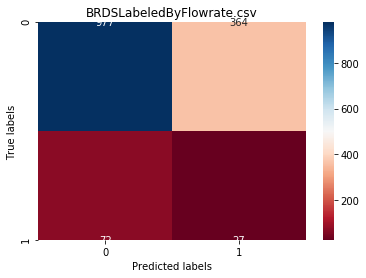

In [376]:
compare_dataframes("LabeledByPrecipitation.csv","BRDSLabeledByFlowrate.csv")

0.20555555555555555
0.06875


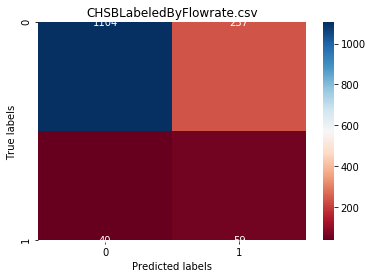

In [377]:
compare_dataframes("LabeledByPrecipitation.csv","CHSBLabeledByFlowrate.csv")

0.06180555555555556
0.06875


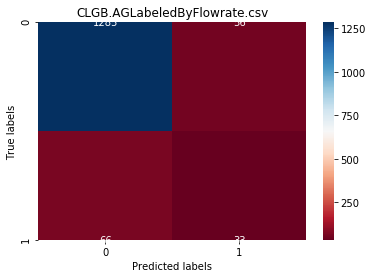

In [378]:
compare_dataframes("LabeledByPrecipitation.csv","CLGB.AGLabeledByFlowrate.csv")

0.07291666666666667
0.06875


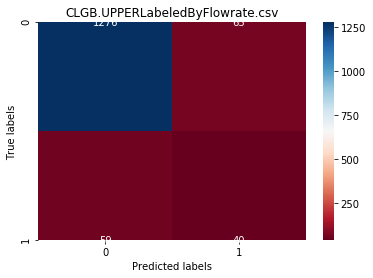

In [379]:
compare_dataframes("LabeledByPrecipitation.csv","CLGB.UPPERLabeledByFlowrate.csv")

0.0798611111111111
0.06875


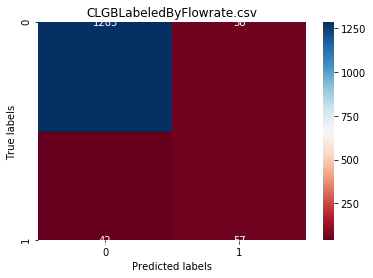

In [380]:
compare_dataframes("LabeledByPrecipitation.csv","CLGBLabeledByFlowrate.csv")

0.0
0.06875


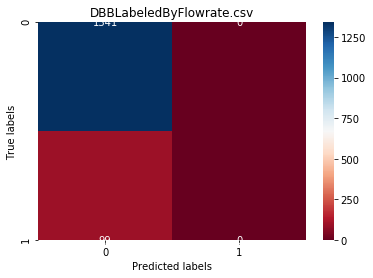

In [381]:
compare_dataframes("LabeledByPrecipitation.csv","DBBLabeledByFlowrate.csv")

0.11458333333333333
0.06875


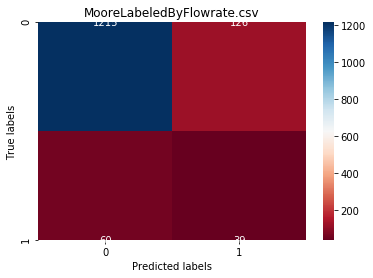

In [382]:
compare_dataframes("LabeledByPrecipitation.csv","MooreLabeledByFlowrate.csv")

0.19652777777777777
0.06875


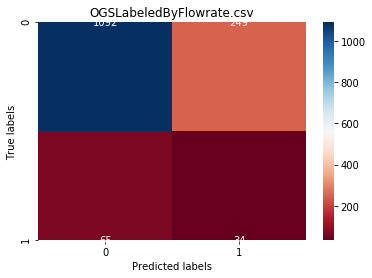

In [383]:
compare_dataframes("LabeledByPrecipitation.csv","OGSLabeledByFlowrate.csv")

0.2861111111111111
0.06875


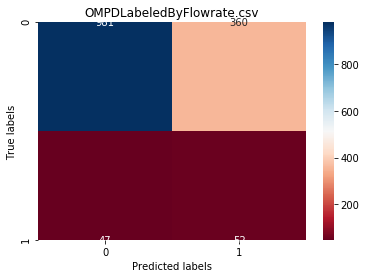

In [384]:
compare_dataframes("LabeledByPrecipitation.csv","OMPDLabeledByFlowrate.csv")

0.007638888888888889
0.06875


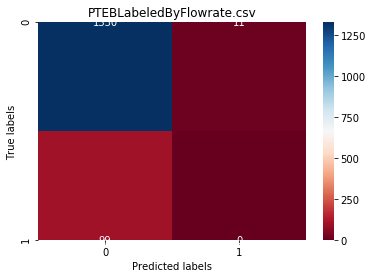

In [385]:
compare_dataframes("LabeledByPrecipitation.csv","PTEBLabeledByFlowrate.csv")

0.054378531073446326
0.06991525423728813


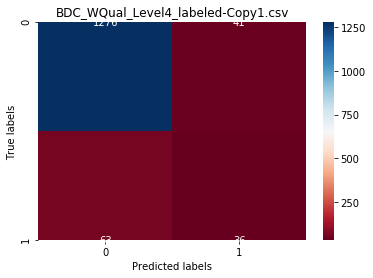

In [386]:
compare_dataframes("LabeledByPrecipitation.csv","BDC_WQual_Level4_labeled-Copy1.csv", column_name = "isStorm", column_name2 = "DATETIME")

0.0
0.06991525423728813


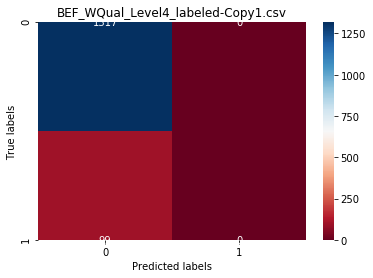

In [387]:
compare_dataframes("LabeledByPrecipitation.csv","BEF_WQual_Level4_labeled-Copy1.csv", column_name = "isStorm", column_name2 = "DATETIME")

0.012005649717514125
0.06991525423728813


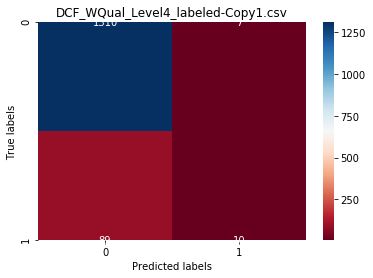

In [388]:
compare_dataframes("LabeledByPrecipitation.csv","DCF_WQual_Level4_labeled-Copy1.csv", column_name = "isStorm", column_name2 = "DATETIME")

0.13708920187793427
0.09014084507042254


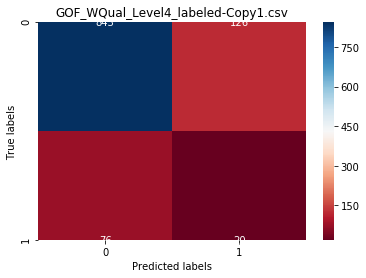

In [389]:
compare_dataframes("LabeledByPrecipitation.csv","GOF_WQual_Level4_labeled-Copy1.csv", column_name = "isStorm", column_name2 = "DATETIME")

0.0
0.07001414427157002


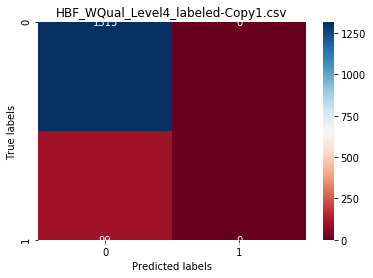

In [390]:
compare_dataframes("LabeledByPrecipitation.csv","HBF_WQual_Level4_labeled-Copy1.csv", column_name = "isStorm", column_name2 = "DATETIME", formt = '%m/%d/%Y %H:%M')


0.0
0.06991525423728813


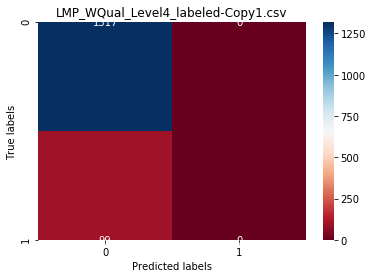

In [391]:
compare_dataframes("LabeledByPrecipitation.csv","LMP_WQual_Level4_labeled-Copy1.csv", column_name = "isStorm", column_name2 = "DATETIME")

0.0
0.06991525423728813


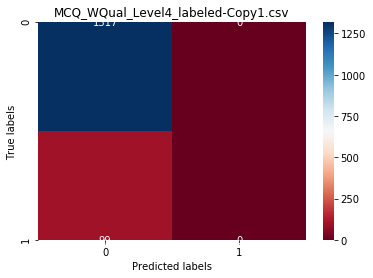

In [392]:
compare_dataframes("LabeledByPrecipitation.csv","MCQ_WQual_Level4_labeled-Copy1.csv", column_name = "isStorm", column_name2 = "DATETIME")

0.0
0.06991525423728813


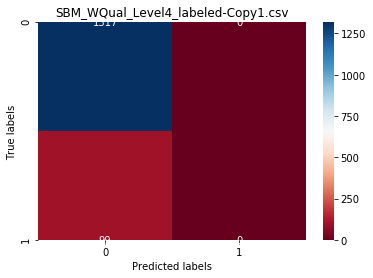

In [393]:
compare_dataframes("LabeledByPrecipitation.csv","SBM_WQual_Level4_labeled-Copy1.csv", column_name = "isStorm", column_name2 = "DATETIME")

0.0
0.06991525423728813


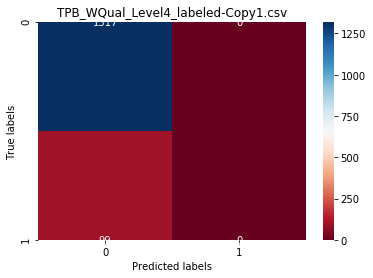

In [394]:
compare_dataframes("LabeledByPrecipitation.csv","TPB_WQual_Level4_labeled-Copy1.csv", column_name = "isStorm", column_name2 = "DATETIME")

0.03177966101694915
0.06991525423728813


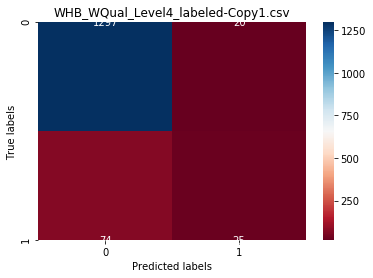

In [395]:
compare_dataframes("LabeledByPrecipitation.csv","WHB_WQual_Level4_labeled-Copy1.csv", column_name = "isStorm", column_name2 = "DATETIME")